In [1]:
import numpy as np

import senmf
import wavutils

import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Compute a Spectrogram

In [16]:
songs = ['data/Berlepschs Tinamou2010-11-6-1.wav',
         'data/Berlepschs_Tinamou1_7-21-08.wav',
         'data/R09_0499-Berlepshs-Tinamou.wav',
         'data/XC238214-Crypturellus_berlepschi12cut1C.wav' 
        ]
X = np.concatenate([np.abs(wavutils.autochannel_stft(s, framesz=.02, hop=.004))[:,:250] for s in songs])

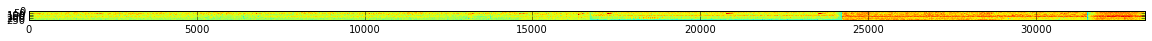

In [19]:
figure(figsize=(20,5))
imshow(np.log(X.T))

### Decompose the Spectrogram

In [16]:
nmf = senmf.SENMF(n_bases=10, window_width=50, X=X)
nmf.rand_D()
nmf.rand_A()
''

''

In [17]:
%time nmf.fit(5)

CPU times: user 26min, sys: 12min 11s, total: 38min 12s
Wall time: 38min 12s


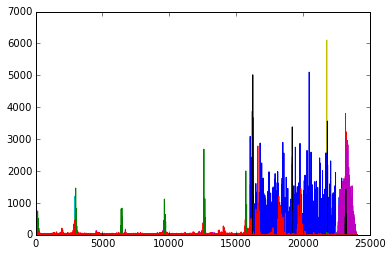

In [18]:
plot(nmf.A.T)

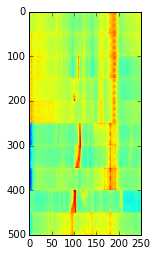

In [19]:
(x,y,z) = nmf.D.shape
imshow(np.log(nmf.D.reshape(x*y, z)))

### Inspect Decomposition

/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


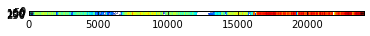

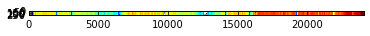

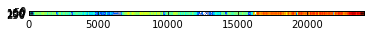

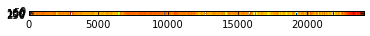

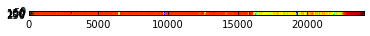

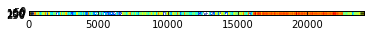

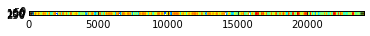

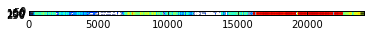

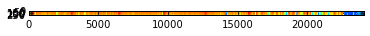

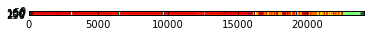

In [20]:
for i in range(nmf.n_bases):
    figure()
    imshow(np.log(nmf.reconstruct_basis(i)))

#### Show the estimate

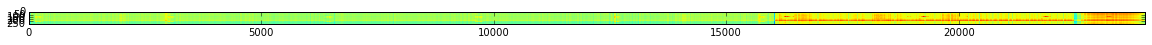

In [21]:
figure(figsize=(20,5))
X_bar = nmf.reconstruct()
imshow(np.log(X_bar).T)

/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


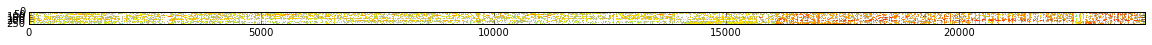

In [22]:
figure(figsize=(20,5))
imshow(np.log(X-X_bar).T)